In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/AAPL_trend_seasonal_residual_data_sentiment.csv')
df.head()

,Date,trend,seasonal,resid,AAPL,target,title,publish_on,author,author_name,sentiment_score,sentiment_label,positive_score,negative_score,change,change_label,weighted_score
0,2010-05-10,8.544874,1.655653,-1.129456,9.071071,9.161429,Android (NASDAQ:GOOG) has passed the iPhone (N...,2010-05-10T11:44:30-04:00,427396.0,"Carl Surran, SA News Editor",0.997832,2.0,1.995664,0.997832,0.090359,positive,-0.107864
1,2010-05-12,8.560438,1.474806,-0.674887,9.360357,9.227143,"Suit, countersuit: HTC files a complaint with ...",2010-05-12T14:22:53-04:00,543215.0,"Carl Surran, SA News Editor",0.999167,1.0,0.999167,0.000000,-0.133214,negative,-0.119023
2,2010-05-12,8.560438,1.474806,-0.674887,9.360357,9.227143,Verizon (NYSE:VZ) and Google (NASDAQ:GOOG) are...,2010-05-12T08:43:44-04:00,234601.0,"Carl Surran, SA News Editor",0.999851,1.0,0.999851,0.000000,-0.133214,negative,-0.119105
3,2010-05-13,8.569313,1.580056,-0.922225,9.227143,9.065000,"Four tech firms - Apple (NASDAQ:AAPL), Microso...",2010-05-13T14:10:08-04:00,543215.0,"Carl Surran, SA News Editor",0.999896,1.0,0.999896,0.000000,-0.162144,negative,-0.119110
4,2010-05-13,8.569313,1.580056,-0.922225,9.227143,9.065000,Adobe Systems (NASDAQ:ADBE) has taken out news...,2010-05-13T09:53:00-04:00,543215.0,"Carl Surran, SA News Editor",0.998224,1.0,0.998224,0.000000,-0.162144,negative,-0.118911


# I am going to figure out the probability of change label with sentiment label


In [2]:

df['change_percentage'] = df['change'] / df['AAPL']
# 0 is negative, 1 is neutral, 2 is positive
df['sentiment_label'] = df['sentiment_label'].astype(int)
df['sentiment_label'] = df['sentiment_label'].map({0: 'negative', 1: 'neutral', 2: 'positive'})
# keep every date only once
df = df.drop_duplicates(subset=['Date'])
df.head()


,Date,trend,seasonal,resid,AAPL,target,title,publish_on,author,author_name,sentiment_score,sentiment_label,positive_score,negative_score,change,change_label,weighted_score,change_percentage
0,2010-05-10,8.544874,1.655653,-1.129456,9.071071,9.161429,Android (NASDAQ:GOOG) has passed the iPhone (N...,2010-05-10T11:44:30-04:00,427396.0,"Carl Surran, SA News Editor",0.997832,positive,1.995664,0.997832,0.090359,positive,-0.107864,0.009961
1,2010-05-12,8.560438,1.474806,-0.674887,9.360357,9.227143,"Suit, countersuit: HTC files a complaint with ...",2010-05-12T14:22:53-04:00,543215.0,"Carl Surran, SA News Editor",0.999167,neutral,0.999167,0.000000,-0.133214,negative,-0.119023,-0.014232
3,2010-05-13,8.569313,1.580056,-0.922225,9.227143,9.065000,"Four tech firms - Apple (NASDAQ:AAPL), Microso...",2010-05-13T14:10:08-04:00,543215.0,"Carl Surran, SA News Editor",0.999896,neutral,0.999896,0.000000,-0.162144,negative,-0.119110,-0.017572
5,2010-05-17,8.607501,1.068448,-0.596663,9.079286,9.012857,The latest iSuppli report has Research in Moti...,2010-05-17T13:25:25-04:00,427396.0,"Eli Hoffmann, SA News Editor",0.999885,neutral,0.999885,0.000000,-0.066428,negative,-0.119109,-0.007316
6,2010-05-18,8.618071,1.076245,-0.681459,9.012857,8.869286,So Steve Jobs (NASDAQ:AAPL) is human after all...,2010-05-18T10:37:15-04:00,543215.0,"Eli Hoffmann, SA News Editor",0.999849,neutral,0.999849,0.000000,-0.143572,negative,-0.119105,-0.015930


In [3]:
df_up = df[df['change_label'] == 'positive']
df_down = df[df['change_label'] == 'negative']



<Axes: >

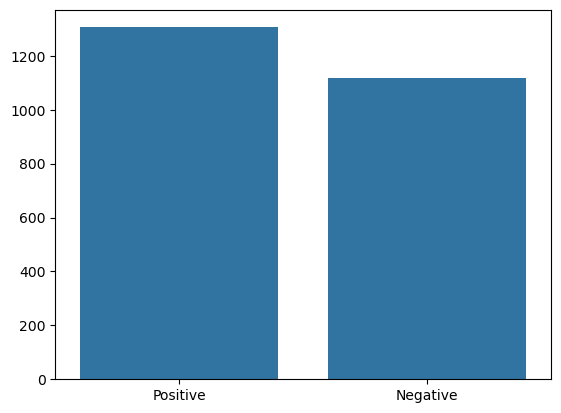

In [4]:
# plot the length of df_up and df_down
sns.barplot(x=['Positive','Negative'], y=[len(df_up), len(df_down)])

In [5]:
#the percentage of stock go up when the sentiment is positive
up_positive, up_neutral, up_negative = df_up['sentiment_label'].value_counts(normalize=True)
print(f"The percentage of stock go up when the sentiment is positive: {up_positive}")
print(f"The percentage of stock go up when the sentiment is neutral: {up_neutral}")
print(f"The percentage of stock go up when the sentiment is negative: {up_negative}")
#plot the distribution of the df_down
down_positive, down_neutral, down_negative = df_down['sentiment_label'].value_counts(normalize=True)
print(f"The percentage of stock go down when the sentiment is positive: {down_positive}")
print(f"The percentage of stock go down when the sentiment is neutral: {down_neutral}")
print(f"The percentage of stock go down when the sentiment is negative: {down_negative}")


The percentage of stock go up when the sentiment is positive: 0.5796324655436447
The percentage of stock go up when the sentiment is neutral: 0.2572741194486983
The percentage of stock go up when the sentiment is negative: 0.16309341500765698
The percentage of stock go down when the sentiment is positive: 0.5738585496866607
The percentage of stock go down when the sentiment is neutral: 0.25156669650850494
The percentage of stock go down when the sentiment is negative: 0.17457475380483437


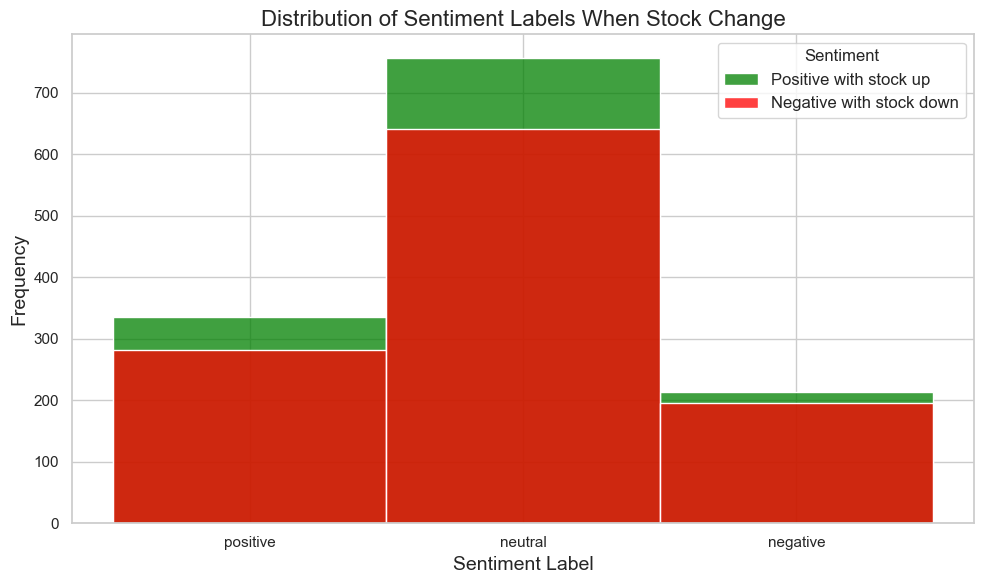

In [6]:
#plot the distribution of the df_up and df_down
# Set Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df_up['sentiment_label'], label='Positive with stock up', color='green',  bins=30)
sns.histplot(df_down['sentiment_label'], label='Negative with stock down', color='red',  bins=30)
# Add title and labels
plt.title('Distribution of Sentiment Labels When Stock Change', fontsize=16)
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [7]:
from scipy import stats
#T-test for the difference in the mean of the sentiment score between df_up and df_down
t_stat, p_value = stats.ttest_ind(df_up['sentiment_score'], df_down['sentiment_score'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.5977869121028783, P-value: 0.1102209068806799


### Hypothesis Testing

1. **Null Hypothesis (\(H_0\))**:
   - The mean sentiment score of `df_up` is equal to the mean sentiment score of `df_down`.
   - Mathematically: \(\mu_{\text{up}} = \mu_{\text{down}}\)

2. **Alternative Hypothesis (\(H_a\))**:
   - The mean sentiment score of `df_up` is not equal to the mean sentiment score of `df_down`.
   - Mathematically: \(\mu_{\text{up}} \neq \mu_{\text{down}}\)

### Conclusion

- **Fail to Reject \(H_0\)**: There is not enough statistical evidence to conclude that there is a significant difference in the mean sentiment scores between `df_up` and `df_down`.